In [1]:
! pip install numpy pandas matplotlib requests mplsoccer cmasher

In [2]:
from typing import List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import requests
from mplsoccer import Pitch, VerticalPitch, FontManager
import cmasher as cmr

In [3]:
real_madrid_sofascore_ids = [
    ("Joselu", 69418),
    ("Vinicius Junior", 868812),
    ("Dani Carvajal", 138572),
    ("Federico Valverde", 831808),
    ("Jude Bellingham", 991011),
    ("Eduardo Camavinga", 973887),
    ("Ferland Mendy", 792073)
]

barcelona_sofascore_ids = [
    ("Ronald Araujo", 925097),
    ("Gavi", 1103693),
    ("Joao Cancelo", 138892),
    ("Ilkay Gundogan", 45853)
]

In [4]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'uk,ru-RU;q=0.9,ru;q=0.8,en-US;q=0.7,en;q=0.6',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"9f784e861d"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
}
headers['If-Modified-Since'] = 'Mon, 1 Jan 2024 00:00:00 GMT'

In [5]:
heatmap_responses_real_madrid = [(requests.get(f'https://api.sofascore.com/api/v1/event/11369369/player/{player_id}/heatmap', headers=headers), player_name) for player_name, player_id in real_madrid_sofascore_ids]
heatmap_responses_barcelona = [(requests.get(f'https://api.sofascore.com/api/v1/event/11369369/player/{player_id}/heatmap', headers=headers), player_name) for player_name, player_id in barcelona_sofascore_ids]

heatmap_dfs_real_madrid = [pd.DataFrame(response.json()['heatmap']) for response, player_name in heatmap_responses_real_madrid]
heatmap_dfs_barcelona = [pd.DataFrame(response.json()['heatmap']) for response, player_name in heatmap_responses_barcelona]

In [6]:
# fontmanager for google font (robotto)
robotto_regular = FontManager("https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Regular.ttf")

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

In [7]:
def plot_heatmap(team_name: str, team_against_name: str, team_heatmap_dfs: List[pd.DataFrame], team_sofascore_ids: List[Tuple[int, int]], n_cols: int, n_rows: int, plot_juego_de_posicion=False):
    if plot_juego_de_posicion:
        pitch = VerticalPitch(pitch_type='opta', line_zorder=2,
                      pitch_color='#22312b', line_color='white')
        fig, axs = pitch.grid(ncols=n_cols,  endnote_height=0.03, endnote_space=0, axis=False, figheight=22, bottom=0.025, space=0.1,
                                title_height=0.08, grid_height=0.84, nrows=n_rows)
        fig.set_facecolor('#22312b')
        for idx, ax in enumerate(axs['pitch'].flat):
            bin_statistic = pitch.bin_statistic_positional(team_heatmap_dfs[idx].x, team_heatmap_dfs[idx].y, statistic='count',
                                                    positional='full', normalize=True)
            pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
            pitch.scatter(team_heatmap_dfs[idx].x, team_heatmap_dfs[idx].y, c='white', s=2, ax=ax)
            labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                        ax=ax, ha='center', va='center',
                                        str_format='{:.0%}', path_effects=path_eff)
            ax.set_title(team_sofascore_ids[idx][0], color='#edede9', fontsize=14)
        axs['title'].text(0.5, 0.65, f'{team_name} Key Players Heatmap vs {team_against_name}', fontsize=22,
                        va='center', ha='center', color='#edede9')
    else:
        pitch = VerticalPitch(pitch_type='opta',  line_zorder=2,
                  line_color='#c7d5cc', pitch_color='#22312b')
        fig, axs = pitch.grid(ncols=n_cols,  endnote_height=0.03, endnote_space=0, axis=False, figheight=22, bottom=0.025, space=0.1,
                                title_height=0.08, grid_height=0.84, nrows=n_rows)
        fig.set_facecolor('#22312b')
        for idx, ax in enumerate(axs['pitch'].flat):
            pitch.kdeplot(team_heatmap_dfs[idx].x, team_heatmap_dfs[idx].y, ax=ax, 
                            fill=True, levels=100, 
                            cmap=cmr.pride,
                            thresh=0,
                            cut=4,
                            zorder=1
                            )
            ax.set_title(team_sofascore_ids[idx][0], color='#edede9', fontsize=14)
        axs['title'].text(0.5, 0.65, f'{team_name} Key Players Heatmap vs {team_against_name}', fontsize=22,
                        va='center', ha='center', color='#edede9')

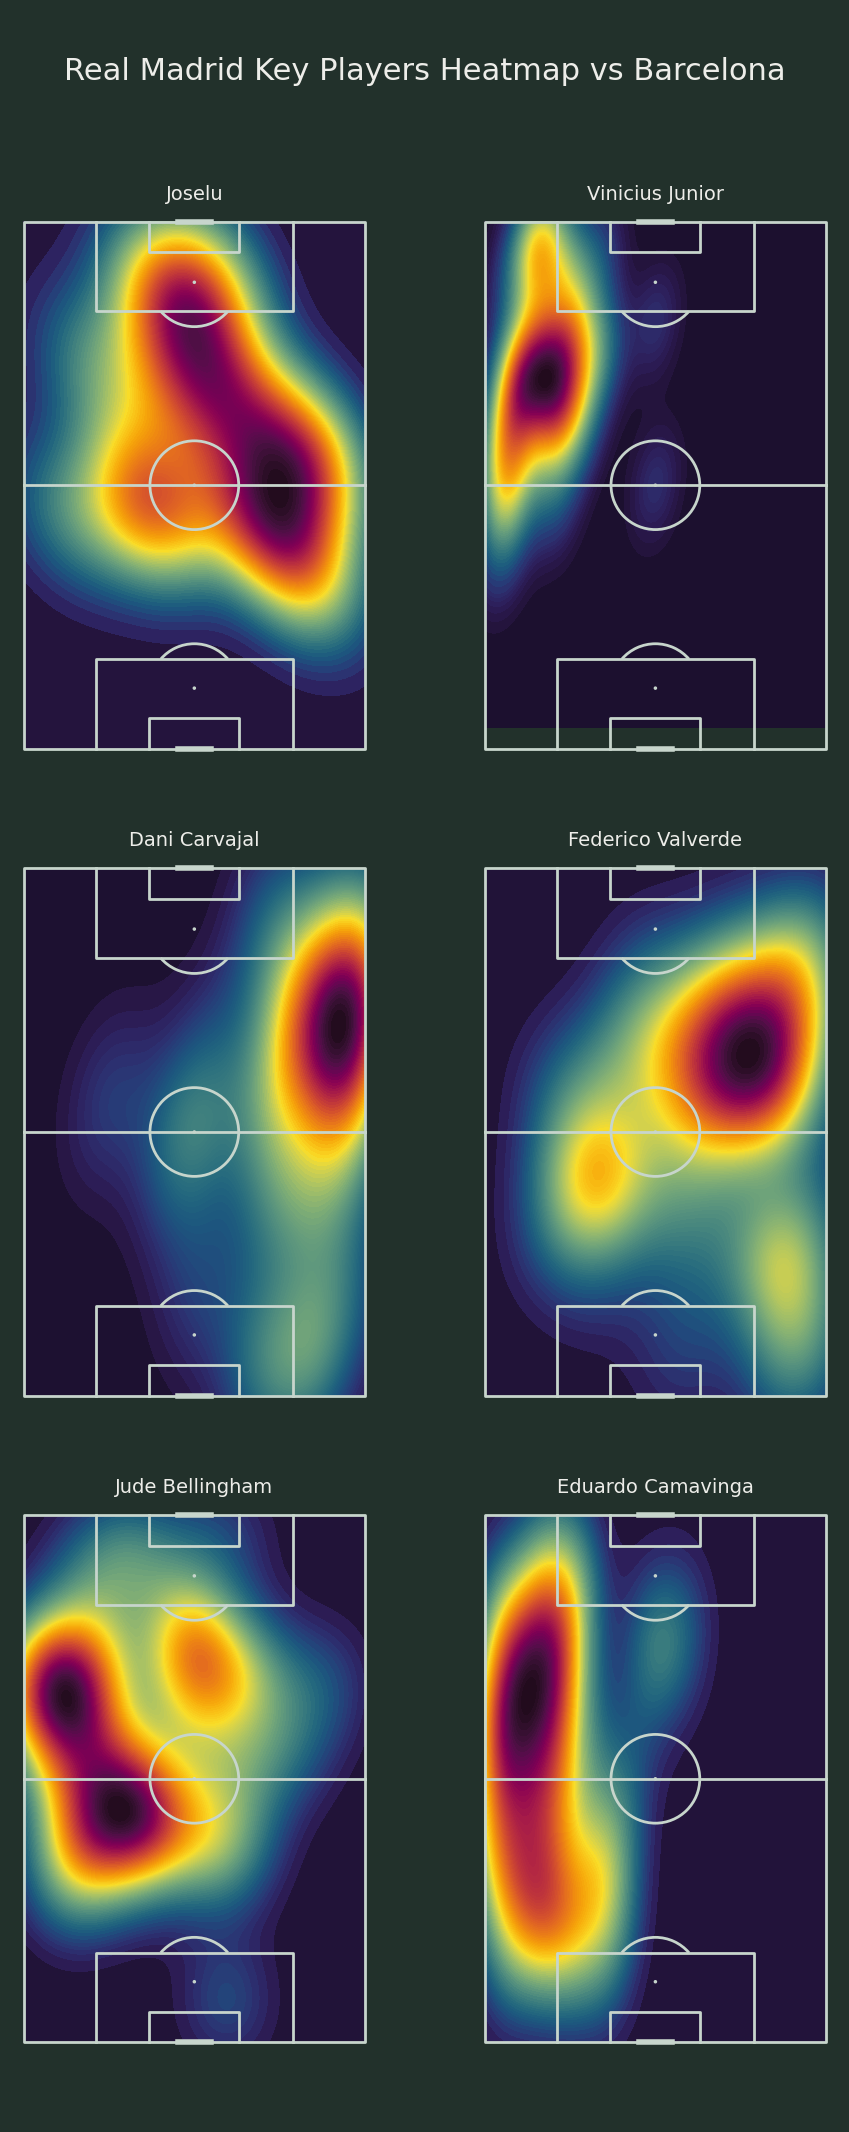

In [8]:
plot_heatmap("Real Madrid", "Barcelona", heatmap_dfs_real_madrid, real_madrid_sofascore_ids, 2, 3)

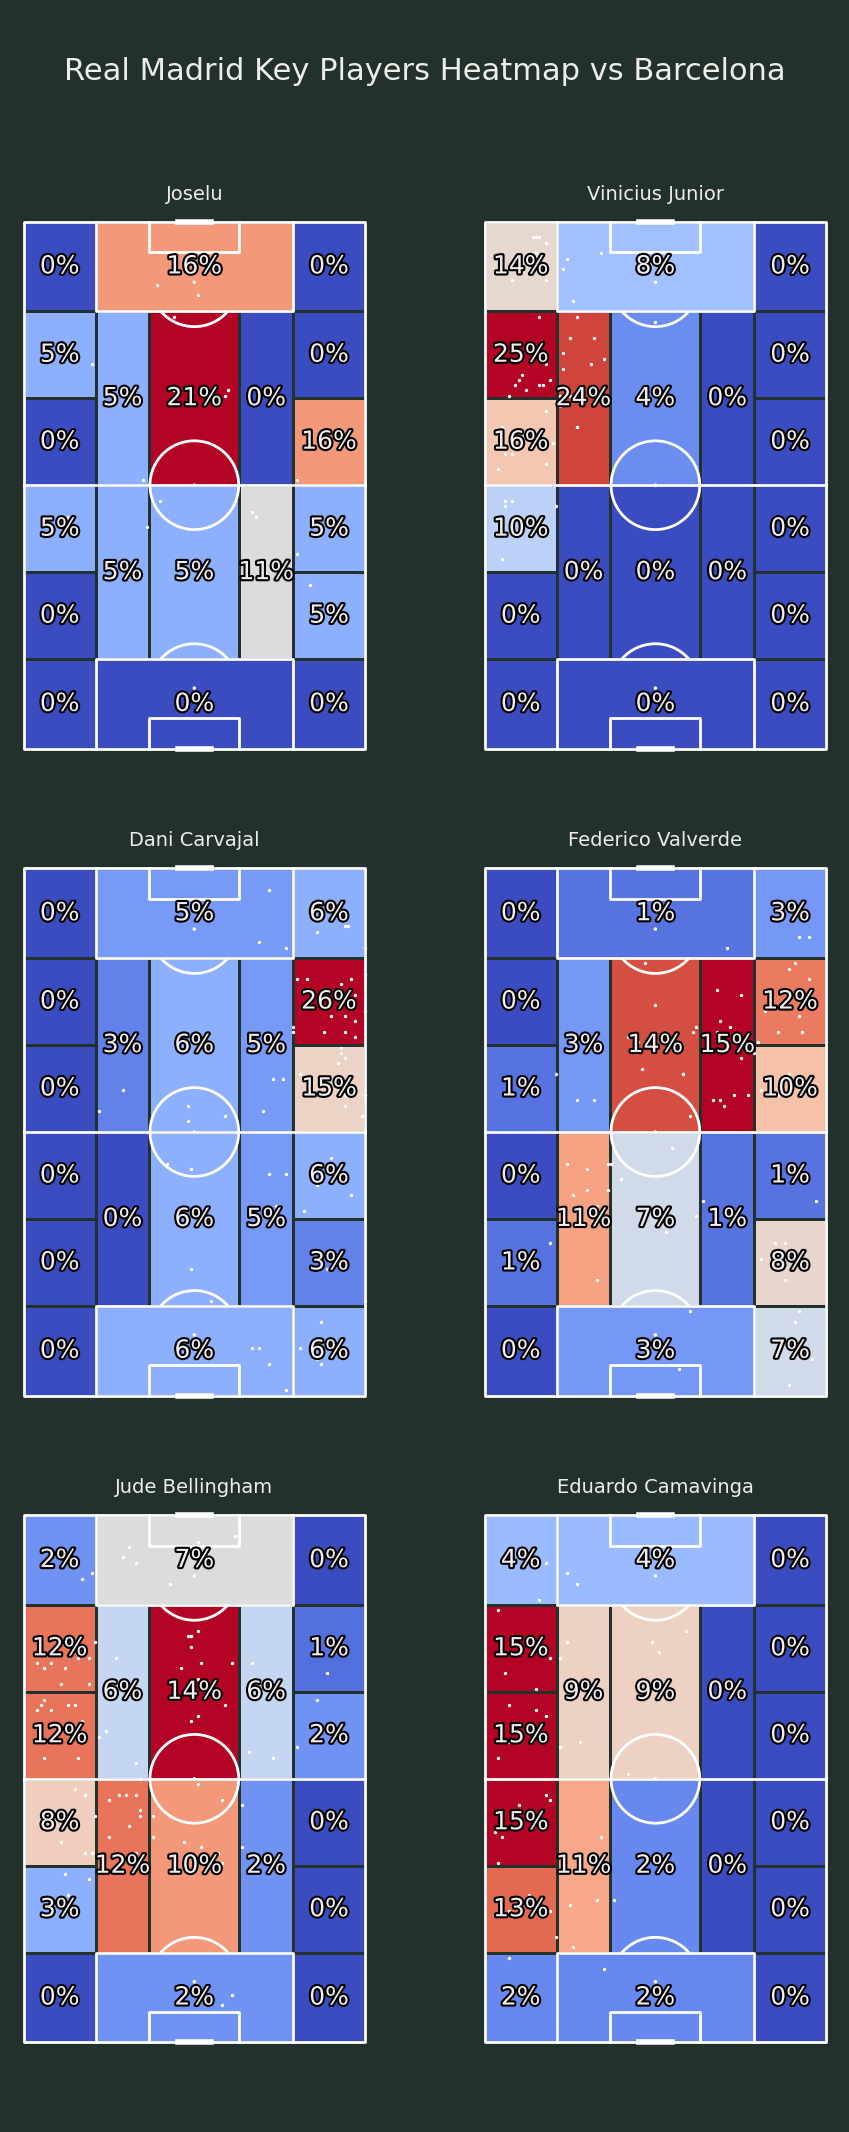

In [9]:
plot_heatmap("Real Madrid", "Barcelona", heatmap_dfs_real_madrid, real_madrid_sofascore_ids, 2, 3, plot_juego_de_posicion=True)

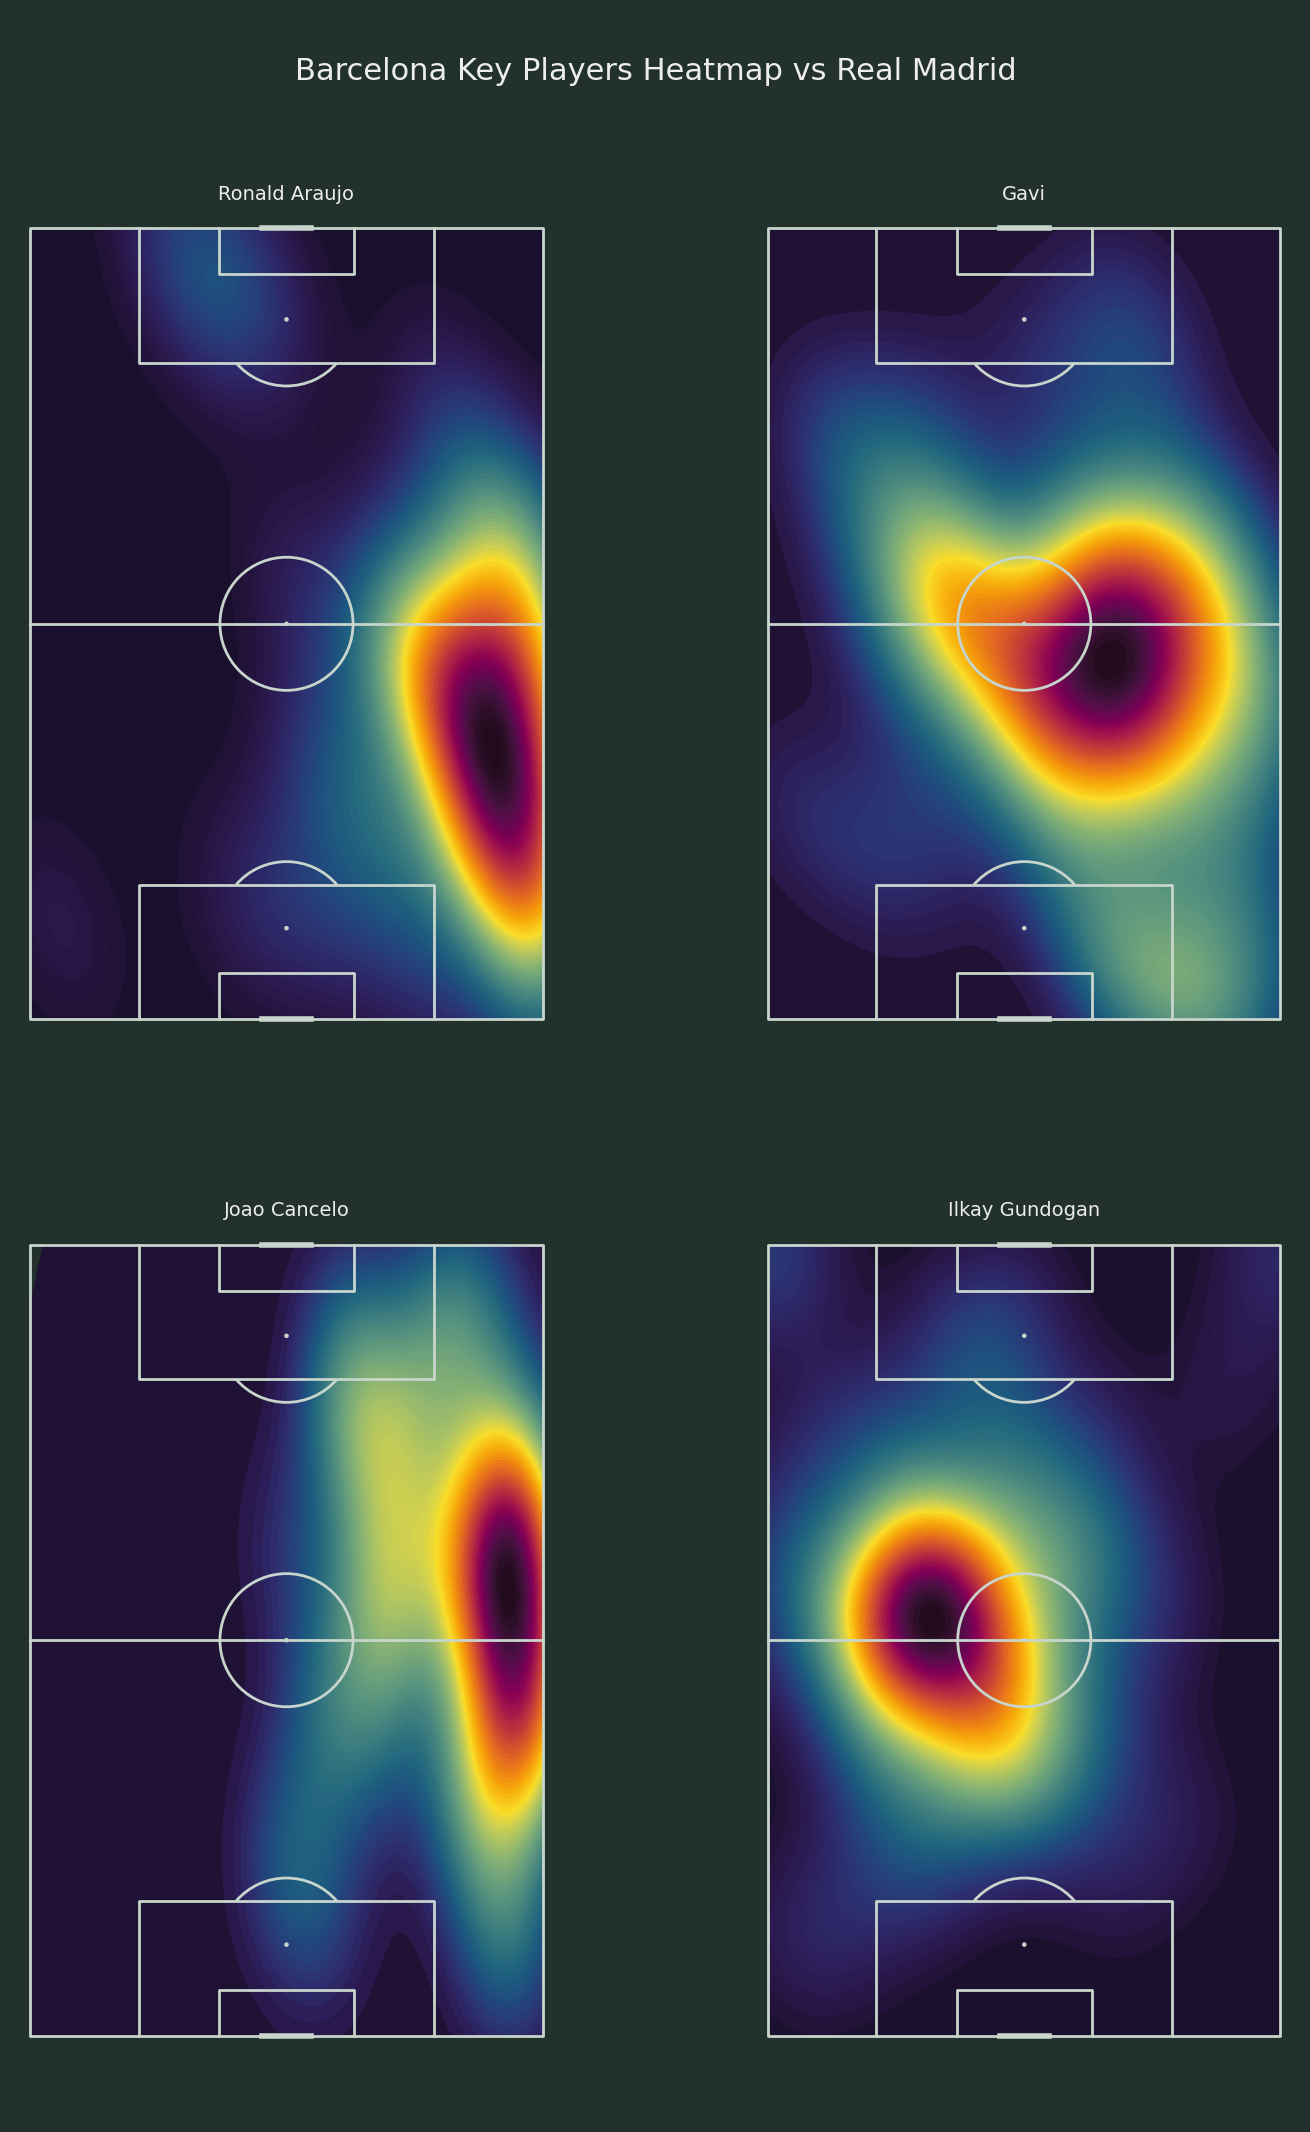

In [10]:
plot_heatmap("Barcelona", "Real Madrid", heatmap_dfs_barcelona, barcelona_sofascore_ids, 2, 2)

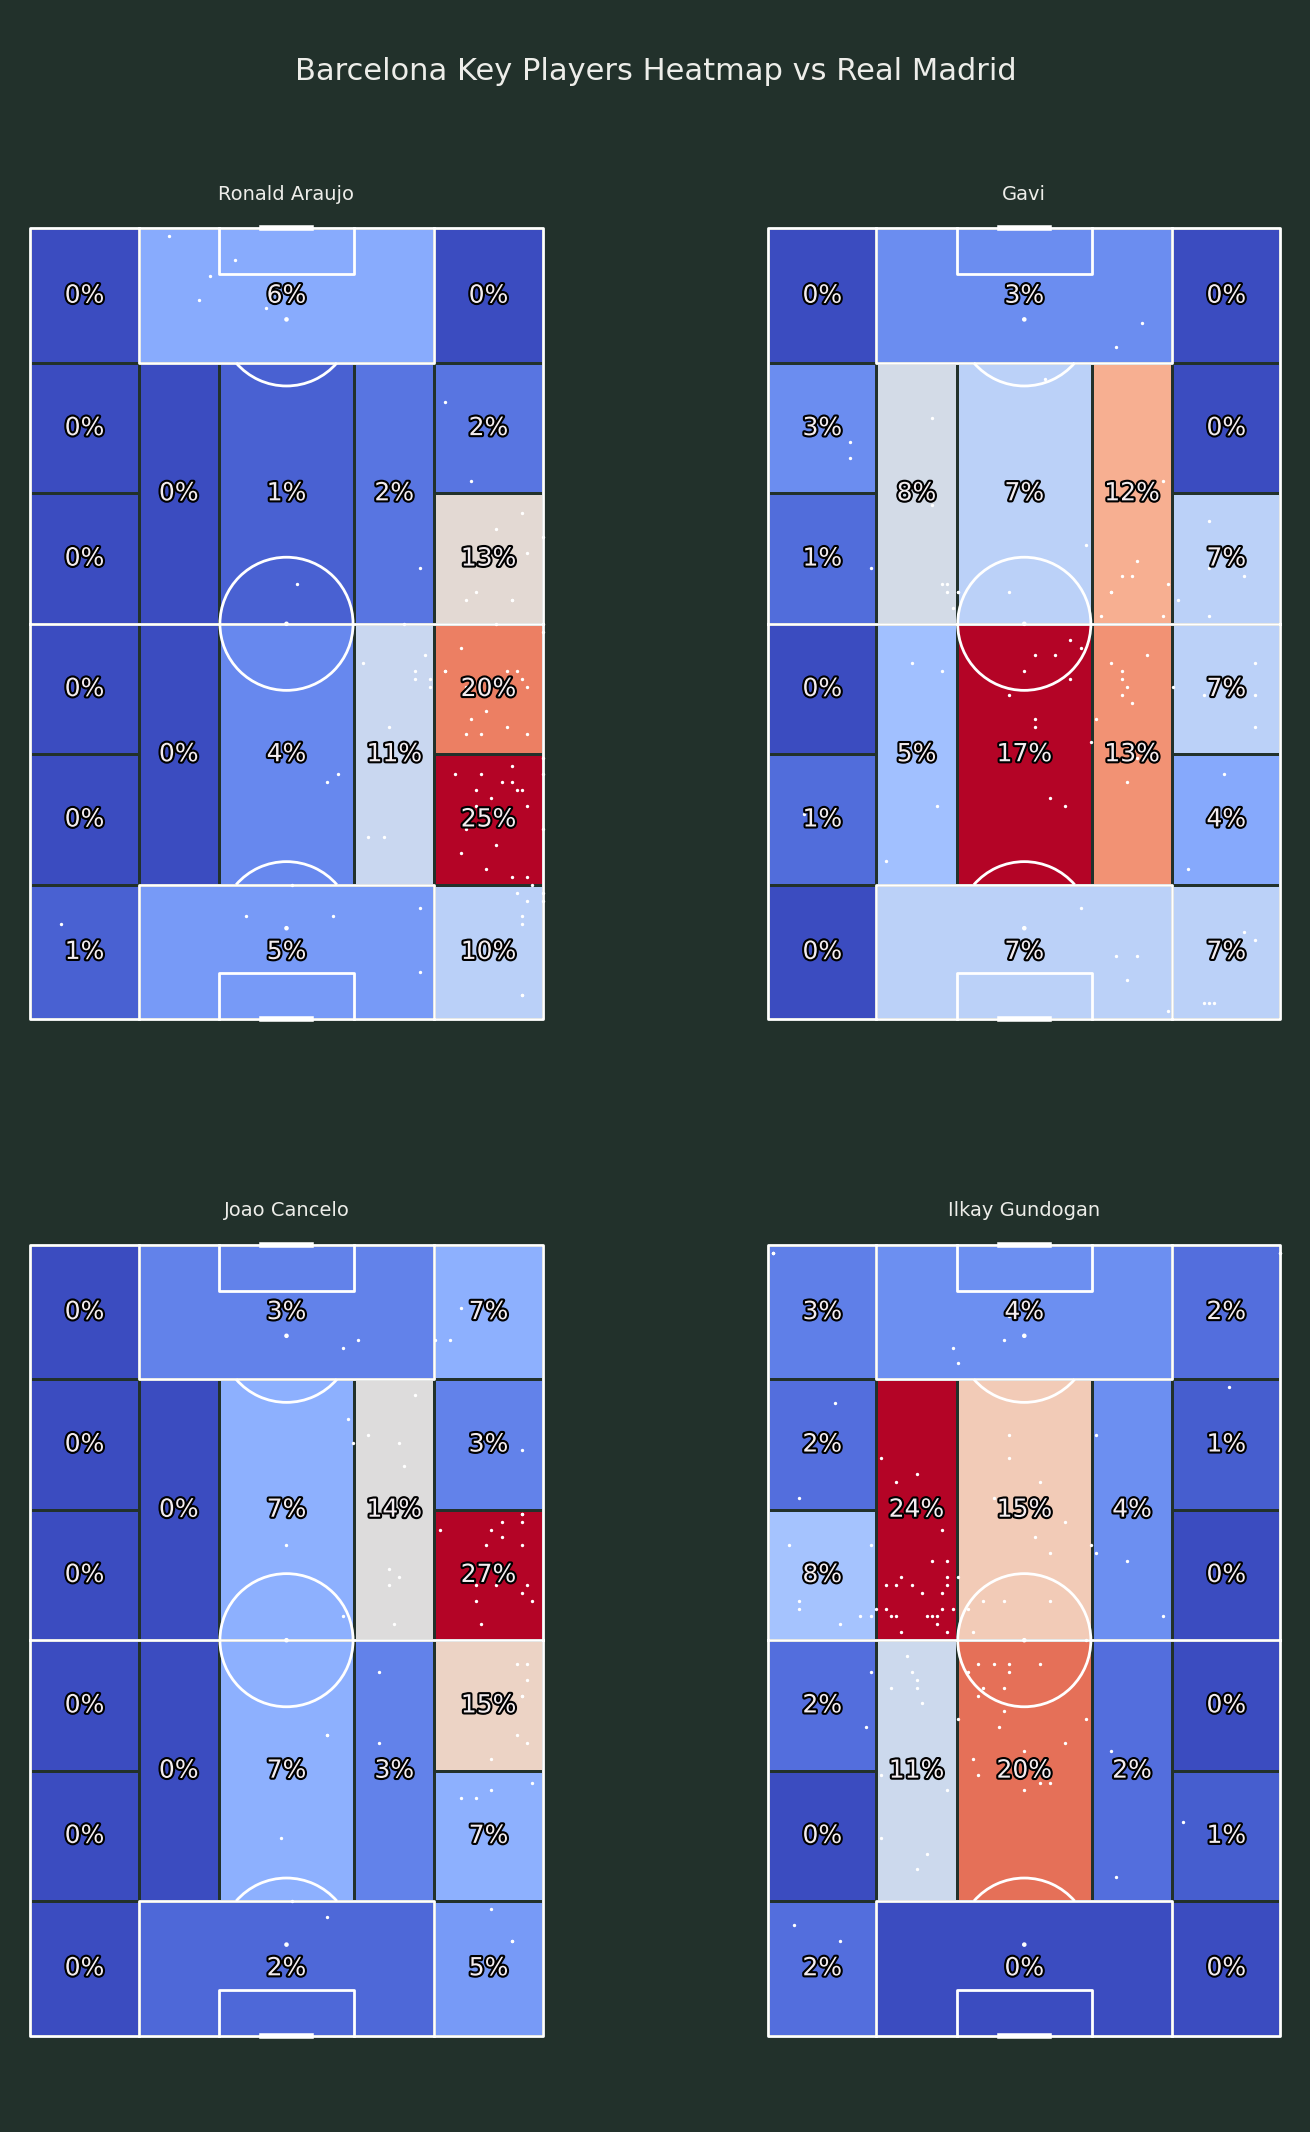

In [11]:
plot_heatmap("Barcelona", "Real Madrid", heatmap_dfs_barcelona, barcelona_sofascore_ids, 2, 2, plot_juego_de_posicion=True)